In [1]:
from csv import DictReader

with open('../_data/fluidized_bed.csv', 'r') as csv_file:

    reader = DictReader(csv_file)
    rows = [r for r in reader]

csv_file.close()

In [2]:
from typing import List, Tuple

def get_yields(rows: List[dict], inp: str, inp_limit: int = None) -> Tuple[List[float]]:
    """ Only retrieves samples with all data (input var, % yields) available """

    input, oil, char, gas = [], [], [], []
    for row in rows:
        try:
            _i = float(row[inp])
            if inp_limit:
                if _i > inp_limit: continue
            _o = float(row['Oil'])
            _c = float(row['Char'])
            _g = float(row['Gas'])
            input.append(_i)
            oil.append(_o)
            char.append(_c)
            gas.append(_g)
        except:
            continue
    return (input, oil, char, gas)

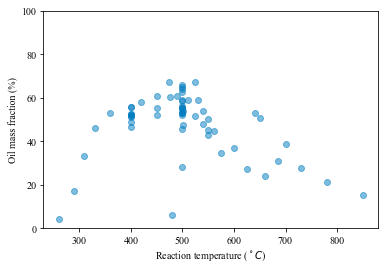

In [3]:
# Temperature vs. oil yield
from matplotlib import pyplot as plt

t_reaction, oil, char, gas = get_yields(rows, 'Temperature (C)')

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Reaction temperature ($^\circ C$)')
plt.ylabel('Oil mass fraction (%)')
plt.ylim((0.0, 100.0))
plt.scatter(t_reaction, oil, color=(0, 114/235, 178/235), label='Oil', alpha=0.5)
plt.savefig('_plots/fluidized_bed/reaction_temp_oil.png', dpi=200)
plt.show()

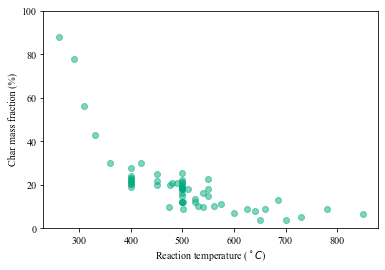

In [4]:
# Temperature vs. char yield

t_reaction, oil, char, gas = get_yields(rows, 'Temperature (C)')

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Reaction temperature ($^\circ C$)')
plt.ylabel('Char mass fraction (%)')
plt.ylim((0.0, 100.0))
plt.scatter(t_reaction, char, color=(0, 158/235, 115/235), label='Char', alpha=0.5)
plt.savefig('_plots/fluidized_bed/reaction_temp_char.png', dpi=200)
plt.show()

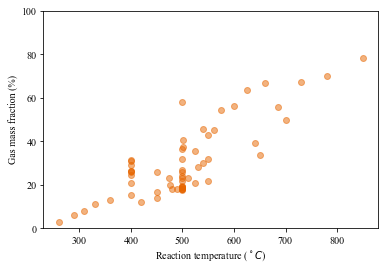

In [5]:
# Temperature vs. char yield

t_reaction, oil, char, gas = get_yields(rows, 'Temperature (C)')

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Reaction temperature ($^\circ C$)')
plt.ylabel('Gas mass fraction (%)')
plt.ylim((0.0, 100.0))
plt.scatter(t_reaction, gas, color=(213/235, 94/235, 0), label='Gas', alpha=0.5)
plt.savefig('_plots/fluidized_bed/reaction_temp_gas.png', dpi=200)
plt.show()